# **Introduction** 💳 ⚕

The Sure Tomorrow insurance company wants to solve several tasks with the help of machine learning, and you are asked to evaluate that possibility.

* Task 1: Find customers who are similar to the given customer. This will help the company's agents with marketing.
* Task 2: Predict whether a new customer is likely to receive an insurance benefit. Can a trained model do better than a random model?
* Task 3: Predict the number of insurance benefits a new customer is likely to receive using a Linear Regression model.
* Task 4: Develop a way to protect clients' personal data without affecting the model from the previous task.

    It's necessary to develop a data transformation algorithm that would make it hard to recover personal information if the data fell into the wrong hands. This is called data masking, or data obfuscation. But the data should be protected in such a way that the quality of machine learning models doesn't suffer. You don't need to pick the best model, just prove that the algorithm works correctly.

## Project Instructions

1. Download the data.
2. Check the data is free of issues — there is no missing data, extreme values, and so on.
Work on each task and answer the questions posed in the project template.
3. Draw conclusions based on your experience working on the project.
4. There are two appendices in the project template with useful information.

## Data Description
The dataset is stored in file /datasets/insurance_us.csv. You can download the dataset here (https://practicum-content.s3.us-west-1.amazonaws.com/datasets/insurance_us.csv)

    **Features:** insured person's gender, age, salary, and number of family members.

    **Target:** number of insurance benefits received by the insured person over the last five years.

## Project evaluation
We’ve put together the evaluation criteria for the project. Read this carefully before moving on to the task.

Here’s what the reviewers will look at when reviewing your project:

* Have you followed all the steps of the instructions?
* Have you kept to the project structure?
* Have you kept the code neat?
* Have you developed all necessary procedures and answered all the questions?
* Have you made your conclusions?

You have your takeaway sheets and chapter summaries, so you are ready to proceed to the project.

Good luck!

# **Initialization** 🚀

In [ ]:
!pip install pyclustering
!pip install faker

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 13.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyclustering: filename=pyclustering-0.10.1.2-py3-none-any.whl size=2395101 sha256=85a72e2e6258c1db6d17e31415f1a81d6e8fa50da22538c1f571ecd2171261c9
  Stored in directory: /root/.cache/pip/wheels/b5/42/97/11eee99f5c1e4fdfc170f0a54f9c9eb195df66edb4cf69f449
Successfully built pyclustering
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 16.4 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.decomposition import PCA
import itertools

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, r2_score, precision_score, f1_score, classification_report, confusion_matrix, mean_squared_error

from faker import Faker

In [ ]:
insurance_us_root = pd.read_csv('https://practicum-content.s3.us-west-1.amazonaws.com/datasets/insurance_us.csv')

print(insurance_us_root.head(5))

print(insurance_us_root.info())

display(insurance_us_root.describe())

   Gender   Age   Salary  Family members  Insurance benefits
0       1  41.0  49600.0               1                   0
1       0  46.0  38000.0               1                   1
2       0  29.0  21000.0               0                   0
3       0  21.0  41700.0               2                   0
4       1  28.0  26100.0               0                   0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              5000 non-null   int64  
 1   Age                 5000 non-null   float64
 2   Salary              5000 non-null   float64
 3   Family members      5000 non-null   int64  
 4   Insurance benefits  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB
None


,Gender,Age,Salary,Family members,Insurance benefits
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


In [ ]:
# Quality assurance (QA) check to identify any irregularities in the datasets

def qa_check(df):
    print(f"Checking {df.shape[0]} rows and {df.shape[1]} columns in DataFrame...")

    # Check data structure
    df.info()

    # Check for duplicates
    dup_count = df.duplicated().sum()
    print()
    print(f"Duplicates found: {dup_count}")
    print()

    # Count zeros
    zero_cols = {}
    for col in df.columns:
        zero_count = (df[col] == 0).sum()
        if zero_count > 0:
            zero_cols[col] = zero_count
    print("Columns with zeros:")
    for col, count in zero_cols.items():
        print(f"  {col}: {count}")
    print()

    # Count null/nan and inf/-inf
    nan_cols = {}
    for col in df.columns:
        df_inf = df[col].replace([np.inf, -np.inf], np.nan)
        nan_count = df_inf.isnull().sum()
        if nan_count > 0:
            nan_cols[col] = nan_count
    print("Columns with null/NaN values:")
    for col, count in nan_cols.items():
        print(f"  {col}: {count}")
    print()

qa_check(insurance_us_root)

Checking 5000 rows and 5 columns in DataFrame...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              5000 non-null   int64  
 1   Age                 5000 non-null   float64
 2   Salary              5000 non-null   float64
 3   Family members      5000 non-null   int64  
 4   Insurance benefits  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB

Duplicates found: 153

Columns with zeros:
  Gender: 2505
  Family members: 1513
  Insurance benefits: 4436

Columns with null/NaN values:



# **Exploratory Data Analysis** 🔎

Find customers who are similar to a given customer. This will help the company's agents with marketing.

## Clustering ⭕

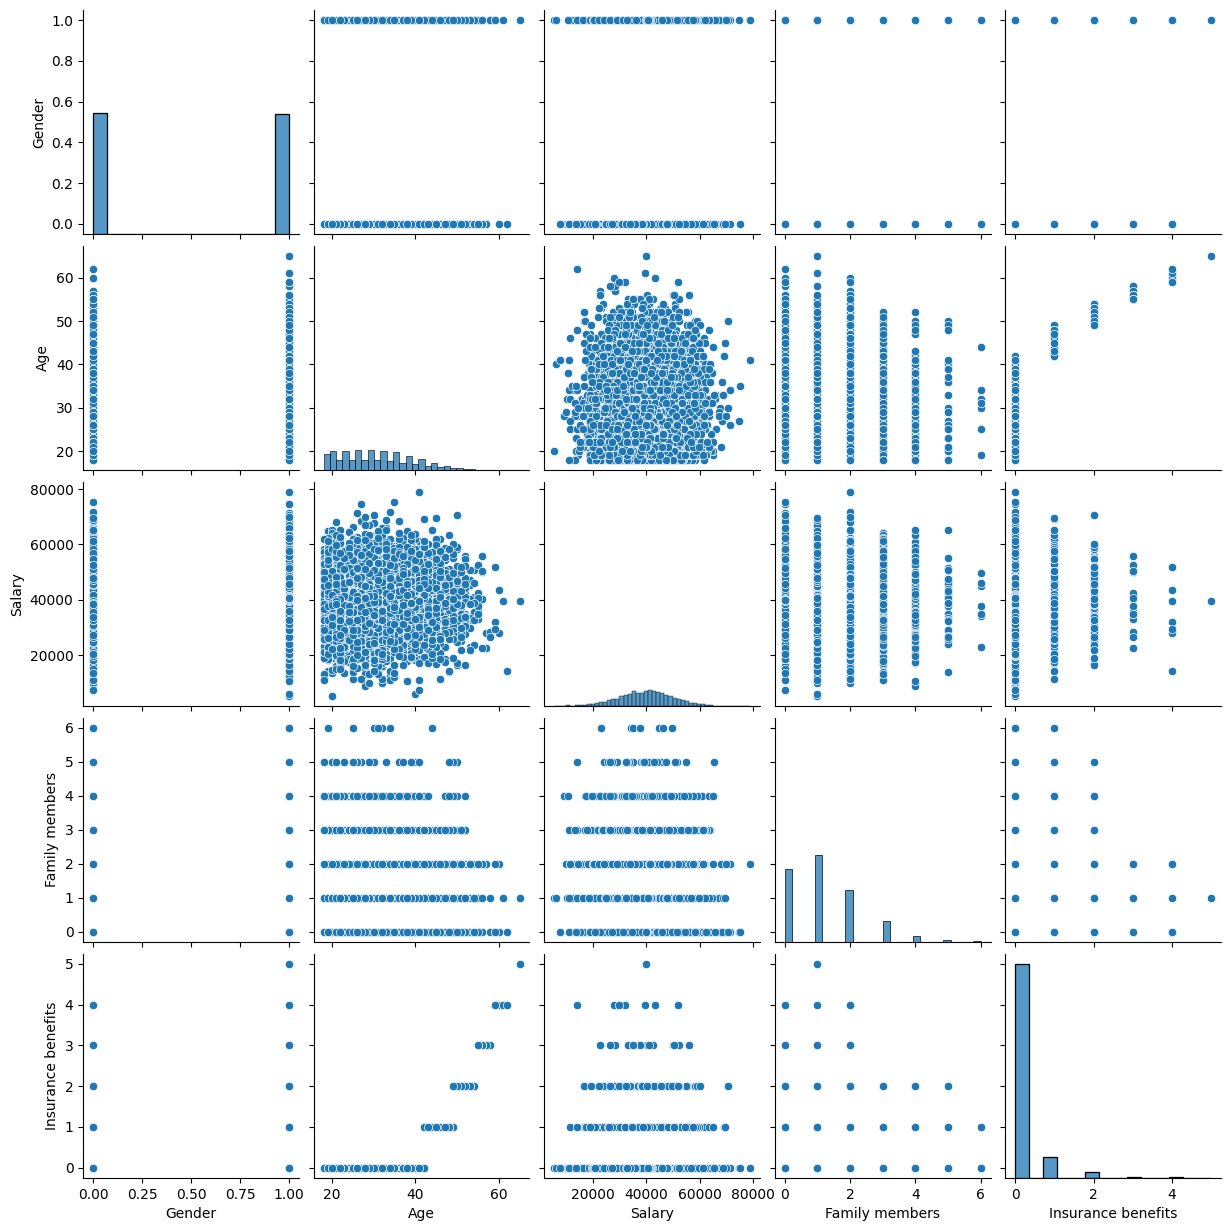

In [ ]:
sns.pairplot(insurance_us_root,
                 hue=None,
                 hue_order=None,
                 palette=None,
                 vars=None,
                 x_vars=None,
                 y_vars=None,
                 kind='scatter',
                 diag_kind='auto',
                 markers=None,
                 height=2.5,
                 aspect=1,
                 corner=False,
                 dropna=False,
                 plot_kws=None,
                 diag_kws=None,
                 grid_kws=None,
                 size=None)

In [ ]:
# Select the 4 features for clustering
features = ['Gender', 'Age', 'Salary', 'Family members']
X = insurance_us_root[features]

# Create a KMeans model with 5 clusters (you can adjust this number)
kmeans = KMeans(n_clusters=5, random_state=42)

# Fit the model to the data
kmeans.fit(X)

# Get the cluster labels for each row
labels = kmeans.labels_

# Add the cluster labels to the original dataframe
insurance_us_root['cluster'] = labels

# Now you can group the dataframe by the cluster labels
grouped_df = insurance_us_root.groupby('cluster')

# You can then analyze the grouped data, for example, by calculating the mean of each feature
mean_values = grouped_df[features].mean()
print(mean_values)

print(insurance_us_root)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


           Gender        Age        Salary  Family members
cluster                                                   
0        0.497660  31.122465  32588.143526        1.185647
1        0.520443  30.491482  47633.390119        1.169506
2        0.489837  30.885501  40344.376694        1.205962
3        0.485130  31.529740  22679.368030        1.291822
4        0.494340  31.166038  56853.584906        1.137736
      Gender   Age   Salary  Family members  Insurance benefits  cluster
0          1  41.0  49600.0               1                   0        1
1          0  46.0  38000.0               1                   1        2
2          0  29.0  21000.0               0                   0        3
3          0  21.0  41700.0               2                   0        2
4          1  28.0  26100.0               0                   0        3
...      ...   ...      ...             ...                 ...      ...
4995       0  28.0  35700.0               2                   0        0
499

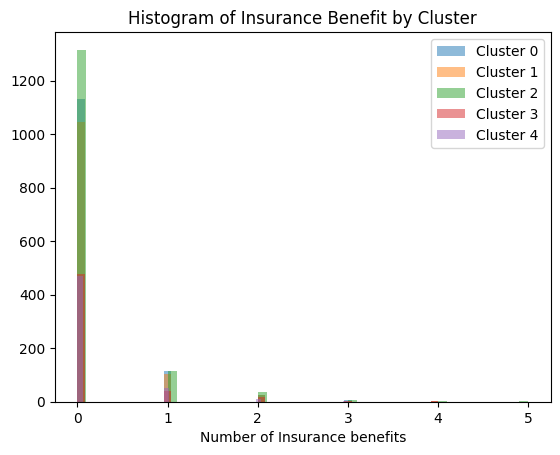

In [ ]:
# Group the dataframe by the cluster labels
grouped_df = insurance_us_root.groupby('cluster')

# Create a figure and axis object
fig, ax = plt.subplots()

# Iterate over each cluster and plot a histogram
for cluster, group in grouped_df:
    ax.hist(group['Insurance benefits'], bins=50, alpha=0.5, label=f'Cluster {cluster}')

# Set the x-axis label and title
ax.set_xlabel('Number of Insurance benefits')
ax.set_title('Histogram of Insurance Benefit by Cluster')

# Add a legend
ax.legend()

# Show the plot
plt.show()

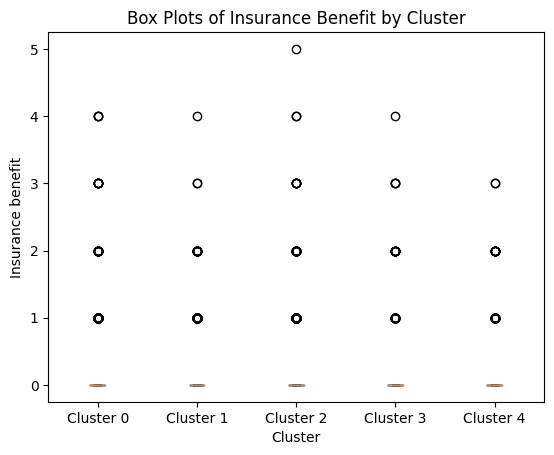

In [ ]:
# Group the dataframe by the cluster labels
grouped_df = insurance_us_root.groupby('cluster')

# Create a figure and axis object
fig, ax = plt.subplots()

# Iterate over each cluster and plot a box plot
for cluster, group in grouped_df:
    ax.boxplot(group['Insurance benefits'], positions=[cluster], labels=[f'Cluster {cluster}'])

# Set the x-axis label and title
ax.set_xlabel('Cluster')
ax.set_ylabel('Insurance benefit')
ax.set_title('Box Plots of Insurance Benefit by Cluster')

# Show the plot
plt.show()

**Comment:** In this section on Exploratory Data Analysis, my two approach was to understand the distribution of the data by using pair-wise scatterplots. The results made sense but were limited to pairwise interpretations. So, in anticipation of the future tasks, I wanted to begin exploring clusterization based on the four input features. I initially wanted to use KMediod because this is how I learned about clustering, but it turns out that only KMeans worked well. Five clusters were formed and the subsequent graphs found that the differences are not very pronounced.

## Principlal Component Analysis 📐

Find customers who are similar to a given customer. This will help the company's agents with marketing.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
from sklearn.decomposition import PCA

# Perform PCA on the scaled features
pca = PCA(n_components=3)  # or 3 for 3D visualization
X_pca = pca.fit_transform(X_scaled)

In [ ]:
from sklearn.manifold import TSNE

# Perform t-SNE on the scaled features
tsne = TSNE(n_components=2, random_state=42)  # or 3 for 3D visualization
X_tsne = tsne.fit_transform(X_scaled)

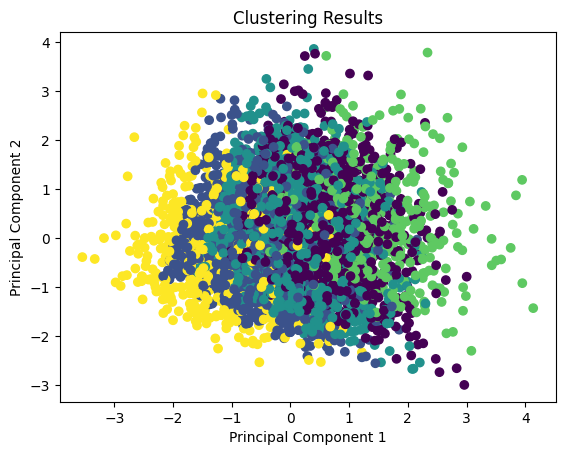

In [ ]:
import matplotlib.pyplot as plt

# Scatter plot of the reduced data
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clustering Results')
plt.show()

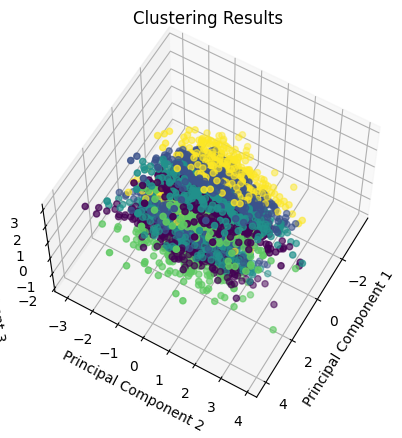

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=labels)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('Clustering Results')

# Rotate the plot
ax.view_init(elev=60, azim=30)

plt.ion()
plt.show()

In [ ]:
# Assuming X_pca is your data
X_pca = insurance_us_root  # replace with your actual data

# Replace with your own feature names
features = ['Gender', 'Age', 'Salary', 'Family members']

pca = PCA(n_components=4)  # set n_components to 4 for 4 possible combinations
components = pca.fit_transform(X_pca[features])

# Create a dictionary to map PC indices to feature names
pc_labels = {i: f"PC {i+1} ({feature})" for i, feature in enumerate(features)}

# Get all possible combinations of 3 components
combinations = list(itertools.combinations(range(4), 3))

for i, combination in enumerate(combinations):
    fig = px.scatter_3d(
        components,
        x=combination[0],
        y=combination[1],
        z=combination[2],
        color=X_pca["Insurance benefits"]  # replace with your target column name
    )
    fig.update_layout(
        title=f"Combination {i+1}: {pc_labels[combination[0]]}, {pc_labels[combination[1]]}, {pc_labels[combination[2]]}",
        scene=dict(
            xaxis=dict(title=pc_labels[combination[0]]),
            yaxis=dict(title=pc_labels[combination[1]]),
            zaxis=dict(title=pc_labels[combination[2]])
        )
    )
    fig.show()

**Comment:** After the successful KMeans clustering into 5 groups, it occured to me that I would need an approach that took into account more variables. I learned in graduate school that principal component analysis is the next step, but is then limited to 3. Since the number of features was low, I was able to evaluate the combinations of three features in an exhaustive manner as demonstrated in the set of 3D scatter plots. What we see here is that ['Age'] and ['Salary'] have a large effect on determining cluster, while the ['Family Members'] and ['Gender'] don't really have an impact on the determination of cluster. What this means is that the small differences that we noticed in the clusters produced by KMeans are mainly guided by differences in the age and salary of customers.

# **Evaluation of Model 1** 💻

Predict whether a new customer is likely to receive an insurance benefit. Can a trained prediction model do better than an untrained dummy model? Can it do worse? Explain your logic.

In [ ]:
# Add a new column 'Insurance benefits (Yes/No)' to the DataFrame
insurance_us_root['Insurance benefits (Yes/No)'] = np.where(insurance_us_root['Insurance benefits'] > 0, 1, 0)

# Display the first 5 rows of the DataFrame to verify the result
print(insurance_us_root.head())

   Gender   Age   Salary  Family members  Insurance benefits  cluster  \
0       1  41.0  49600.0               1                   0        1   
1       0  46.0  38000.0               1                   1        2   
2       0  29.0  21000.0               0                   0        3   
3       0  21.0  41700.0               2                   0        2   
4       1  28.0  26100.0               0                   0        3   

   Insurance benefits (Yes/No)  
0                            0  
1                            1  
2                            0  
3                            0  
4                            0  


In [ ]:
# Assuming insurance_us_root is your DataFrame
target = 'Insurance benefits (Yes/No)'

# Drop rows with NaN values
insurance_us_root = insurance_us_root.dropna()

# Drop the target column and store the result in X and y
X = insurance_us_root.drop(columns = [target, 'Insurance benefits', 'cluster', 'Customer ID'])
y = insurance_us_root[target]

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [ ]:
# Fit the decision tree classifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

# Predict the target variable for the test set
y_pred_decision_tree = decision_tree.predict(X_test)

# Evaluate the decision tree classifier performance
decision_tree_accuracy = accuracy_score(y_test, y_pred_decision_tree)
decision_tree_precision = precision_score(y_test, y_pred_decision_tree, average = 'binary')
decision_tree_fscore = f1_score(y_test, y_pred_decision_tree, average = 'binary')
decision_tree_report = classification_report(y_test, y_pred_decision_tree)
decision_tree_matrix = confusion_matrix(y_test, y_pred_decision_tree)

print("Decision Tree Classifier Performance:")
print(f"Accuracy: {decision_tree_accuracy:.3f}")
print(f"Precision: {decision_tree_precision:.3f}")
print(f"F1 Score: {decision_tree_fscore:.3f}")
print()
print("Classification Report:")
print(decision_tree_report)
print("Confusion Matrix:")
print(decision_tree_matrix)

Decision Tree Classifier Performance:
Accuracy: 1.000
Precision: 1.000
F1 Score: 1.000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1118
           1       1.00      1.00      1.00       132

    accuracy                           1.00      1250
   macro avg       1.00      1.00      1.00      1250
weighted avg       1.00      1.00      1.00      1250

Confusion Matrix:
[[1118    0]
 [   0  132]]


In [ ]:
# Fit the decision tree classifier
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train, y_train)

# Predict the target variable for the test set
y_pred_decision_tree = decision_tree.predict(X_test)

# Evaluate the decision tree classifier performance
decision_tree_accuracy = accuracy_score(y_test, y_pred_decision_tree)
decision_tree_precision = precision_score(y_test, y_pred_decision_tree, average = 'binary')
decision_tree_fscore = f1_score(y_test, y_pred_decision_tree, average = 'binary')
decision_tree_report = classification_report(y_test, y_pred_decision_tree)
decision_tree_matrix = confusion_matrix(y_test, y_pred_decision_tree)

print("Decision Tree Regressor Performance:")
print(f"Accuracy: {decision_tree_accuracy:.3f}")
print(f"Precision: {decision_tree_precision:.3f}")
print(f"F1 Score: {decision_tree_fscore:.3f}")
print()
print("Classification Report:")
print(decision_tree_report)
print("Confusion Matrix:")
print(decision_tree_matrix)

Decision Tree Regressor Performance:
Accuracy: 1.000
Precision: 1.000
F1 Score: 1.000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1118
           1       1.00      1.00      1.00       132

    accuracy                           1.00      1250
   macro avg       1.00      1.00      1.00      1250
weighted avg       1.00      1.00      1.00      1250

Confusion Matrix:
[[1118    0]
 [   0  132]]


In [ ]:
# Fit the random forest classifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)

# Predict the target variable for the test set
y_pred_random_forest = random_forest.predict(X_test)

# Evaluate the random forest classifier performance
random_forest_accuracy = accuracy_score(y_test, y_pred_random_forest)
random_forest_precision = precision_score(y_test, y_pred_random_forest, average='binary')
random_forest_fscore = f1_score(y_test, y_pred_random_forest, average='binary')
random_forest_report = classification_report(y_test, y_pred_random_forest)
random_forest_matrix = confusion_matrix(y_test, y_pred_random_forest)

print("Random Forest Classifier Performance:")
print(f"Accuracy: {random_forest_accuracy:.3f}")
print(f"Precision: {random_forest_precision:.3f}")
print(f"F1 Score: {random_forest_fscore:.3f}")
print()
print("Classification Report:")
print(random_forest_report)
print("Confusion Matrix:")
print(random_forest_matrix)

Random Forest Classifier Performance:
Accuracy: 1.000
Precision: 1.000
F1 Score: 1.000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1118
           1       1.00      1.00      1.00       132

    accuracy                           1.00      1250
   macro avg       1.00      1.00      1.00      1250
weighted avg       1.00      1.00      1.00      1250

Confusion Matrix:
[[1118    0]
 [   0  132]]


In [ ]:
# Fit the random forest regressor
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)

# Predict the target variable for the test set
y_pred_random_forest = random_forest.predict(X_test)

# Evaluate the random forest classifier performance
random_forest_accuracy = accuracy_score(y_test, y_pred_random_forest)
random_forest_precision = precision_score(y_test, y_pred_random_forest, average='binary')
random_forest_fscore = f1_score(y_test, y_pred_random_forest, average='binary')
random_forest_report = classification_report(y_test, y_pred_random_forest)
random_forest_matrix = confusion_matrix(y_test, y_pred_random_forest)

print("Random Forest Regressor Performance:")
print(f"Accuracy: {random_forest_accuracy:.3f}")
print(f"Precision: {random_forest_precision:.3f}")
print(f"F1 Score: {random_forest_fscore:.3f}")
print()
print("Classification Report:")
print(random_forest_report)
print("Confusion Matrix:")
print(random_forest_matrix)

Random Forest Regressor Performance:
Accuracy: 1.000
Precision: 1.000
F1 Score: 1.000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1118
           1       1.00      1.00      1.00       132

    accuracy                           1.00      1250
   macro avg       1.00      1.00      1.00      1250
weighted avg       1.00      1.00      1.00      1250

Confusion Matrix:
[[1118    0]
 [   0  132]]


**Comment:** To finish the task, I first went through this task by implementing a binary encoding method which says Yes (1) or No (0) based on whether there was a utilization of health benefits or not (['Health benefits'] > 0). I decided to test classifiers first because I wanted to predict the encoded variable which is binary. The results were that they had perfect prediction. The results seemed strange, so I tested regressors and they produced the same results. After revisitng my QC block which finds the number of 0 rows in a dataframe, it is safe to say that it would be pretty easy to predict given the high number of zeroes.

# **Evaluation of Model 2** 💻

Predict the number of insurance benefits a new customer is likely to receive using a linear regression model.

In [ ]:
target2 = 'Insurance benefits'

X2 = insurance_us_root.drop(columns=[target, 'Insurance benefits (Yes/No)', 'cluster', 'Customer ID'])
y2 = insurance_us_root[target2]

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.25, random_state=42)

In [ ]:
model = LinearRegression()
model.fit(X_train2, y_train2)

y_pred2 = model.predict(X_test2)

mse = mean_squared_error(y_test2, y_pred2)
r2 = r2_score(y_test2, y_pred2)

print("Mean squared error:", mse)
print("R-squared:", r2)

Mean squared error: 1.4760199485673547e-27
R-squared: 1.0


**Comment:** To resolve the next task, I wanted to keep the code slim so I just used the same base variables and effectors and adjusted the targets and inputs. So, when prediciting the number of benefits, the linear regression was also able to predict it very well as measured by MSE and R2-score. Going back to the histogram above, I think it is fair to say that high prediction is guided by the high distrbution of 0 benefits.

# **Evaluation of Model 3**

Predict the cluster designation

In [ ]:
target3 = 'cluster'

X3 = insurance_us_root.drop(columns=[target3, 'Insurance benefits (Yes/No)', 'Customer ID'])
y3 = insurance_us_root[target3]

X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.25, random_state=42)

In [ ]:
model.fit(X_train3, y_train3)

y_pred3 = model.predict(X_test3)

mse = mean_squared_error(y_test3, y_pred3)
r2 = r2_score(y_test3, y_pred3)

print("Mean squared error:", mse)
print("R-squared:", r2)

Mean squared error: 1.4742344551645286
R-squared: 0.08319336625335882


**Comment:** Lastly, I thought it would be cool to evaluate whether the cluster designation (n_clusters=5) could be predicted. It turns out that it is basically impossible to predict the cluster, despite there being 5 distinct ones created by KMeans. This indicates that the differences between clusters are too close. Perhaps a polynomial regression or XGRegressor would have produced a results that are a level or two deeper.

# **Data Masking/ Obsifucation**

Protect clients' personal data without breaking the model from the previous task.

In [ ]:
fake = Faker()

def create_fake_alphanumeric_column(df, column_name):
    df[column_name] = [fake.lexify(text='????????????', letters='ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789') for _ in range(len(df))]
    return df

insurance_us_anonymized = create_fake_alphanumeric_column(insurance_us_root, 'Customer ID')

print(insurance_us_anonymized.head())

   Gender   Age   Salary  Family members  Insurance benefits  cluster  \
0       1  41.0  49600.0               1                   0        1   
1       0  46.0  38000.0               1                   1        2   
2       0  29.0  21000.0               0                   0        3   
3       0  21.0  41700.0               2                   0        2   
4       1  28.0  26100.0               0                   0        3   

   Insurance benefits (Yes/No)   Customer ID  
0                            0  OLHHRJT2SMYC  
1                            1  DS155ANNZS9N  
2                            0  K3KS31X9AIDS  
3                            0  VXRVX55WRH8V  
4                            0  VNT80B95WOWI  


**Comment:** I found a nice tutorial on DataCamp and decided to implement the Faker approach. It was simple enough and I wanted to mimic what I had seen in difference databases which is a 12 – 16 character ID code.

# **Conclusion**

This was a nice exercise because it flowed well. The main challenge was in the clusterization and PCA. Fortunately I had been exposed to these topics years back or it would have been much harder to solve. The main limitation is that the clusters were very similar and > 3 variables cannot be visualized in abstract. The practical conclusion are as followS:

*   It is that Age and Salary are indicative of whether a person uses insurance benefits, not family members and gender.
*   It should be pretty easy to predict whether someone uses benefits or not, and how many benefits they would use.
*   It is not possible to predict which cluster a person belongs to.

